# Breast Cancer Predicting Model

In this project we want to build a model that will help classify class of breast cancer (malignant or ‘bad’ versus benign or ‘good’). We use Logistic Regression model to achieve our results

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV


In [28]:
cancer = pd.read_csv('data/cancer.data', header = None)
cancer.head()
cancer_description = cancer.describe()
print(cancer_description)

                 0           1           2           3           4   \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   
min    6.163400e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.706885e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171710e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238298e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

               5           7           8           9           10  
count  699.000000  699.000000  699.000000  699.000000  699.000000  
mean     3.216023    3.437768    2.866953    1.589413    2.689557  
std      2.214300    2.438364    3.053634    1.715078    0.951273  
min      1.000000    1.000000    1.000000    1.000000    2.000000  
25%      2.000000   

In [29]:
cancer = cancer.rename(columns={0:'id',1:'clump_thickness',2:'cell_size',3:'cell_shape',
                                  4:'marginal_adhesion',5:'epithelial_cell_size',6:'bare_nuclei',
                                  7:'bland_chromatin',8:'normal_nucleoli',9:'mitoses',10:'diagnosis'})

In [30]:
cancer_info = cancer.info()
print(cancer_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    699 non-null    int64 
 1   clump_thickness       699 non-null    int64 
 2   cell_size             699 non-null    int64 
 3   cell_shape            699 non-null    int64 
 4   marginal_adhesion     699 non-null    int64 
 5   epithelial_cell_size  699 non-null    int64 
 6   bare_nuclei           699 non-null    object
 7   bland_chromatin       699 non-null    int64 
 8   normal_nucleoli       699 non-null    int64 
 9   mitoses               699 non-null    int64 
 10  diagnosis             699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None


In [31]:
cancer.drop(['id'],1,inplace=True)

In [33]:
le = LabelEncoder()
for col in cancer:
    if cancer[col].dtype == 'object':
        cancer[col] = le.fit_transform(cancer[col])

In [34]:
cancer.head(0)

,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,diagnosis


In [35]:
print("Cancer data set dimensions : {}".format(cancer.shape))

Cancer data set dimensions : (699, 10)


In [36]:
print("The number of people with Benign : {}".format(len(cancer[cancer.diagnosis == 2])))
print("The number of people with Malignant  : {}".format(len(cancer[cancer.diagnosis == 4])))

The number of people with Benign : 458
The number of people with Malignant  : 241


In [37]:
correlation = cancer.corr()
correlation


,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,diagnosis
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.275181,0.558428,0.535835,0.350034,0.716001
cell_size,0.644913,1.000000,0.906882,0.705582,0.751799,0.356039,0.755721,0.722865,0.458693,0.817904
cell_shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.368403,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.223066,0.666715,0.603352,0.417633,0.696800
epithelial_cell_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.287266,0.616102,0.628881,0.479101,0.682785
bare_nuclei,0.275181,0.356039,0.368403,0.223066,0.287266,1.000000,0.310285,0.347925,0.165369,0.391986
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.310285,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.347925,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.165369,0.344169,0.428336,1.000000,0.423170
diagnosis,0.716001,0.817904,0.818934,0.696800,0.682785,0.391986,0.756616,0.712244,0.423170,1.000000


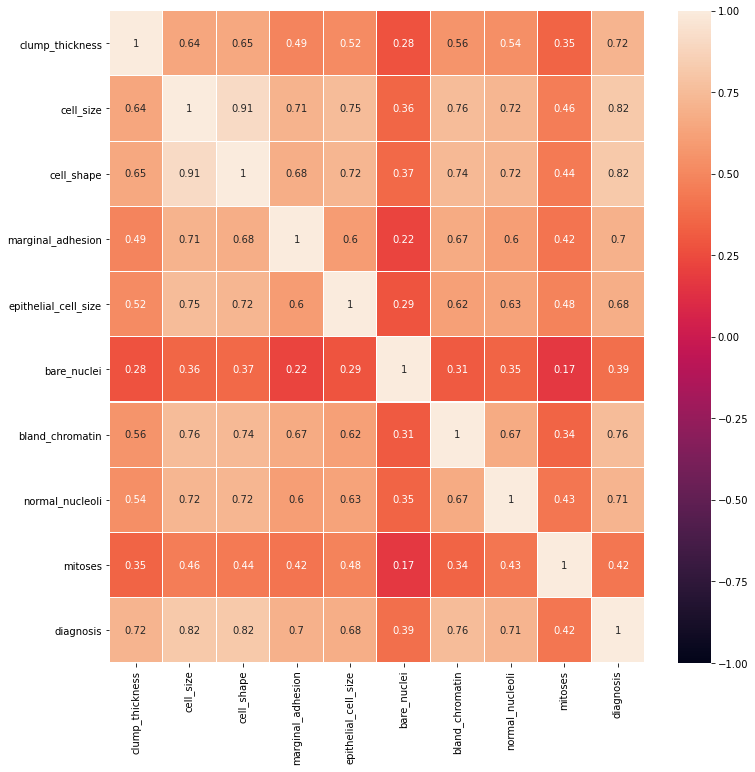

In [38]:
# correlation heatmap

plt.figure(figsize=(12,12))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, linewidth=0.1)

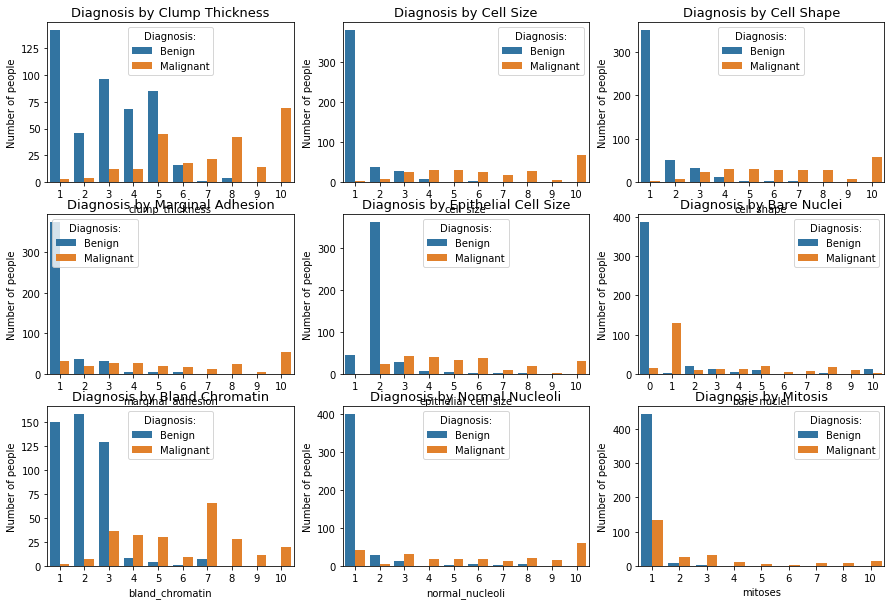

In [39]:
# Use to set hue
by = 'diagnosis'

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
sns.countplot(x='clump_thickness', hue=by, ax=axes[0, 0], data=cancer)
axes[0, 0].set_ylabel('Number of people')
axes[0, 0].set_title('Diagnosis by Clump Thickness', fontsize=13)
axes[0, 0].legend(title = 'Diagnosis:', labels = ['Benign', 'Malignant'])

sns.countplot(x='cell_size', hue=by, ax=axes[0, 1], data=cancer)
axes[0, 1].set_ylabel('Number of people')
axes[0, 1].set_title('Diagnosis by Cell Size', fontsize=13)
axes[0, 1].legend(title = 'Diagnosis:', labels = ['Benign', 'Malignant'])

sns.countplot(x='cell_shape', hue=by, ax=axes[0, 2], data=cancer)
axes[0, 2].set_ylabel('Number of people')
axes[0, 2].set_title('Diagnosis by Cell Shape', fontsize=13)
axes[0, 2].legend(title = 'Diagnosis:', labels = ['Benign', 'Malignant'])

sns.countplot(x='marginal_adhesion', hue=by, ax=axes[1, 0], data=cancer)
axes[1, 0].set_ylabel('Number of people')
axes[1, 0].set_title('Diagnosis by Marginal Adhesion', fontsize=13)
axes[1, 0].legend(title = 'Diagnosis:', labels = ['Benign', 'Malignant'])

sns.countplot(x='epithelial_cell_size', hue=by, ax=axes[1, 1], data=cancer)
axes[1, 1].set_ylabel('Number of people')
axes[1, 1].set_title('Diagnosis by Epithelial Cell Size', fontsize=13)
axes[1, 1].legend(title = 'Diagnosis:', labels = ['Benign', 'Malignant'])

sns.countplot(x='bare_nuclei', hue=by, ax=axes[1, 2], data=cancer)
axes[1, 2].set_ylabel('Number of people')
axes[1, 2].set_title('Diagnosis by Bare Nuclei', fontsize=13)
axes[1, 2].legend(title = 'Diagnosis:', labels = ['Benign', 'Malignant'])

sns.countplot(x='bland_chromatin', hue=by, ax=axes[2, 0], data=cancer)
axes[2, 0].set_ylabel('Number of people')
axes[2, 0].set_title('Diagnosis by Bland Chromatin', fontsize=13)
axes[2, 0].legend(title = 'Diagnosis:', labels = ['Benign', 'Malignant'])

sns.countplot(x='normal_nucleoli', hue=by, ax=axes[2, 1], data=cancer)
axes[2, 1].set_ylabel('Number of people')
axes[2, 1].set_title('Diagnosis by Normal Nucleoli', fontsize=13)
axes[2, 1].legend(title = 'Diagnosis:', labels = ['Benign', 'Malignant'])

sns.countplot(x='mitoses', hue=by, ax=axes[2, 2], data=cancer)
axes[2, 2].set_ylabel('Number of people')
axes[2, 2].set_title('Diagnosis by Mitosis', fontsize=13)
axes[2, 2].legend(title = 'Diagnosis:', labels = ['Benign', 'Malignant'])


In [40]:
X=np.array(cancer.drop(['diagnosis'],1))
y=np.array(cancer['diagnosis'])

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
reg = logreg.fit(rescaledX_train,y_train)
reg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
# logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Getting the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test, y_test))

# Printing the confusion matrix of the logreg model
confusion_matrix(y_test, y_pred)

Accuracy of logistic regression classifier:  0.9771428571428571


array([[117,   1],
       [  3,  54]])

In [45]:

# Define the grid of values for tol and max_iter
tol = ([0.01, 0.001, 0.0001])
max_iter = ([100, 150, 200])

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol = tol, max_iter = max_iter)
grid_model = GridSearchCV(estimator = logreg, param_grid = param_grid, cv = 5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X_train)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y_train)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.948425 using {'max_iter': 100, 'tol': 0.01}
